In [1]:
from nilearn.image import load_img
from nilearn.plotting import plot_glass_brain
import numpy as np

In [2]:
spm_ss_results_dir = "../data/spm_ss_results/parcels"
funroi_results_dir = "../data/funROI_output/parcels"
parcels = [
    "Events_PhotoSem-Perc",
    "Events_SentSem-Perc",
    "Events_SentPhotoSem-Perc",
    "Language_S-N",
]
spm_imgs = {
    parcels: load_img(f"{spm_ss_results_dir}/{parcels}/fROIs.nii")
    for parcels in parcels
}
funroi_imgs = {
    parcels: load_img(f"{funroi_results_dir}/{parcels}/{parcels}_0000.nii.gz")
    for parcels in parcels
}

parcels: Events_PhotoSem-Perc
spm_ss voxels n: 12616
funROI voxels n: 12616
intersection: 12616 (100.00%)
parcels: Events_SentSem-Perc
spm_ss voxels n: 13632
funROI voxels n: 13632
intersection: 13632 (100.00%)
parcels: Events_SentPhotoSem-Perc
spm_ss voxels n: 934
funROI voxels n: 934
intersection: 934 (100.00%)
parcels: Language_S-N
spm_ss voxels n: 4375
funROI voxels n: 4375
intersection: 4375 (100.00%)


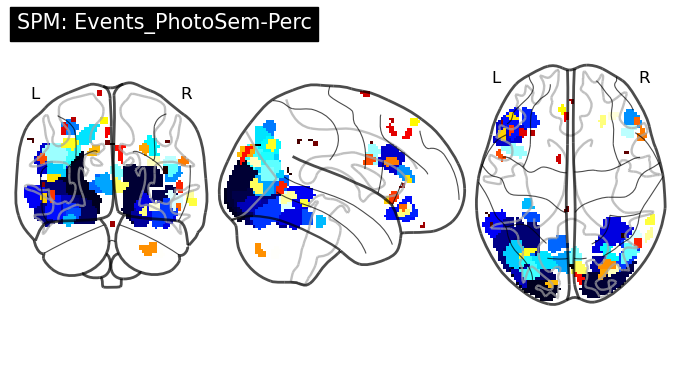

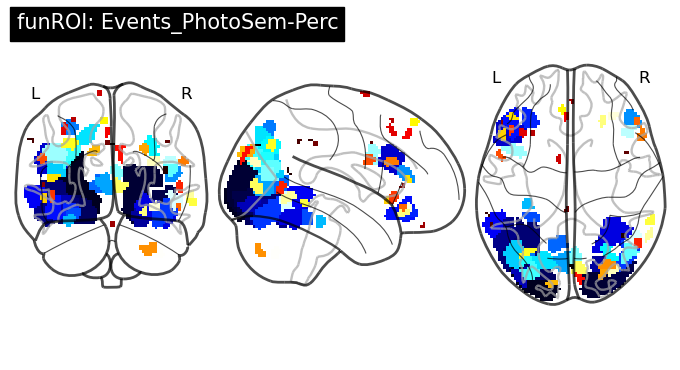

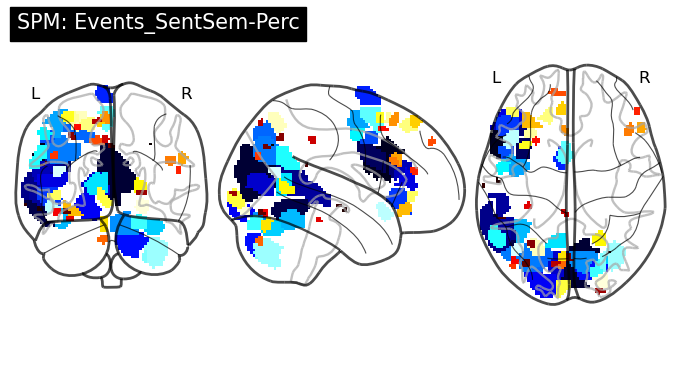

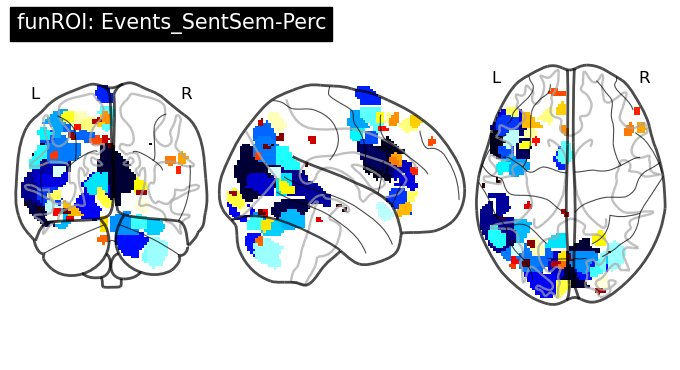

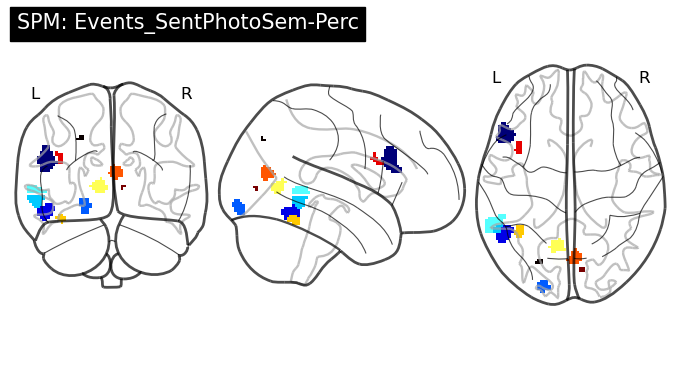

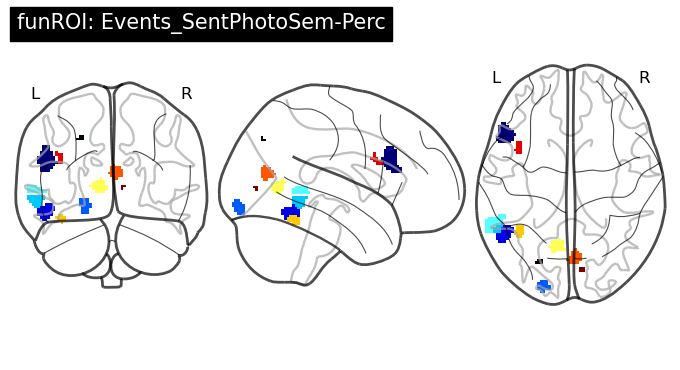

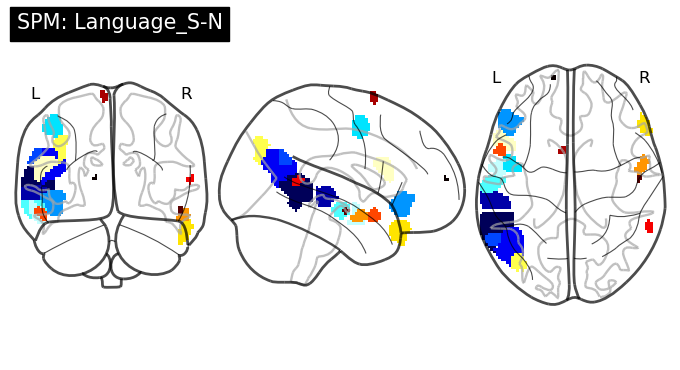

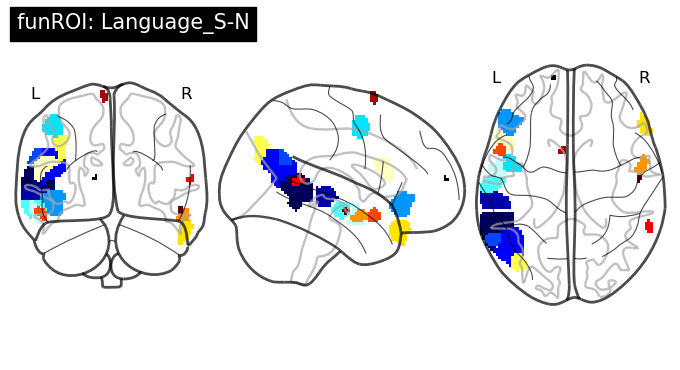

In [3]:
for parcels_i in parcels:
    plot_glass_brain(
        spm_imgs[parcels_i], plot_abs=False, title=f"SPM: {parcels_i}"
    )
    plot_glass_brain(
        funroi_imgs[parcels_i], plot_abs=False, title=f"funROI: {parcels_i}"
    )
    print(f"parcels: {parcels_i}")
    spm_binary = spm_imgs[parcels_i].get_fdata() != 0
    funroi_binary = funroi_imgs[parcels_i].get_fdata() != 0
    print(f"spm_ss voxels n: {np.sum(spm_binary)}")
    print(f"funROI voxels n: {np.sum(funroi_binary)}")
    intersection = np.sum(np.logical_and(spm_binary, funroi_binary))
    pct = intersection / np.sum(spm_binary) * 100
    print(f"intersection: {intersection} ({pct:.2f}%)")